In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. How many features are there and what are they?
2. Show basic statistics of the fetures - both numerical and categorical.
3. What are the days? (Bar chart)
4. What are the times? (Bar chart)
5. What are the sexes? (Pie - % with 0 decimal place)
6. What are the smokers? (Donut - % with 0 decimal place)
7. What is the min, max, average values of total bills? Are there any outliers?
8. What is the min, max, average values of tips? Are there any outliers?
9. Show the customer with max total bill. What are other features of that customer?
10. Show the customer with max tip. What are other features of that customer?
11. What gender has higher footfalls on weekdays?
12. What gender has higher footfalls on weekends?
13. List top ten tippers.
14. List top five tippers on weekends.
15. Who are the generous tipper? - A smoker or a non-smoker?
16. Who are the generous tipper? - A male or a female?
17. List top five female tippers. How many of them were smokers?
18. List top five male tippers. What did they have - Lunch/Dinner?L
19. Create a new column - 'tip%'. It will contain the values of tips w.r.t total bills.
20. Who came with larger party sizes - males or females?
21. Who came with larger party sizes - smokers or non-smokers?
22. What is the maximum tip given by a non-smoker female? 
23. What is the maximum tip given by a smoker male?
24. List top five customers who has highest tip-to-bill ratio.
25. Show distributions of total bill and tips. What conclusion can be drawn from it?

In [5]:
pd.read_csv(r'data\tips.csv')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1. How many features are there and what are they?

In [7]:
df = pd.read_csv(r'data\tips.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


2. Show basic statistics of the features- both numerical and categorical

In [9]:
dff = df.describe() #all numercal values
dff

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
df.describe(include = 'object') # all categorical values

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


3. What are the days? (Bar chart)

In [12]:
df1 = df.day.value_counts()
df1

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

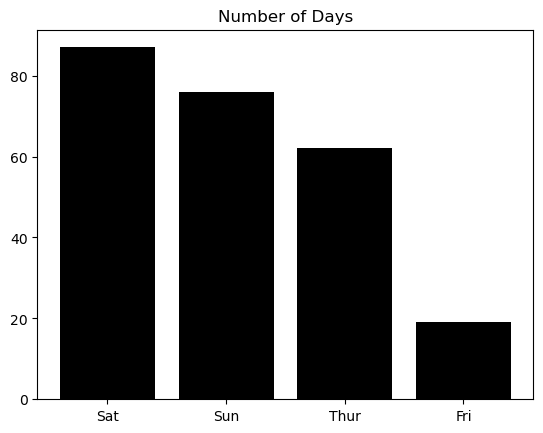

In [13]:
plt.figure()
plt.title("Number of Days")
plt.bar(df1.index, df1.values, color = 'k')
plt.show()

4. What are the times? (Bar Chart)

In [15]:
df2 = df.time.value_counts()
df2

time
Dinner    176
Lunch      68
Name: count, dtype: int64

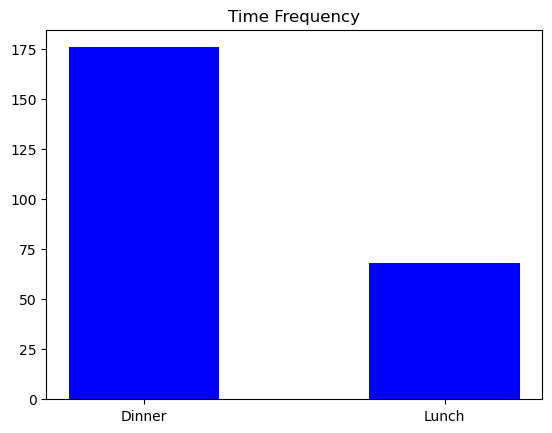

In [16]:
plt.figure()
plt.title('Time Frequency')
plt.bar(df2.index, df2.values, color = 'b', width = 0.5)
plt.show()

5. What are the sexes? (Pie - % with 0 decimal places)

In [18]:
df3 = df.sex.value_counts()
df3

sex
Male      157
Female     87
Name: count, dtype: int64

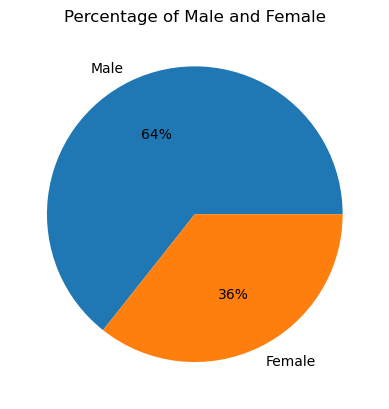

In [19]:
plt.figure()
plt.title('Percentage of Male and Female')
plt.pie(df3, labels = df3.index, autopct = '%0.0f%%')
plt.show()

6. What are the smokers? (Donut - % with 0 decimal place)

In [21]:
df4 = df.smoker.value_counts()
df4

smoker
No     151
Yes     93
Name: count, dtype: int64

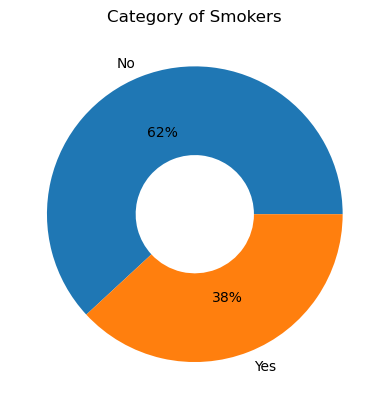

In [22]:
plt.figure()
plt.title('Category of Smokers')
plt.pie(df4, labels = df4.index, autopct = '%0.0f%%', wedgeprops = {'width': 0.6})
plt.show()

7. What are the min, max, average values fo total bills? Are there any outliers?

In [24]:
di = df.describe()
di.iloc[[3, -1, 1], [0]]

,total_bill
min,3.070000
max,50.810000
mean,19.785943


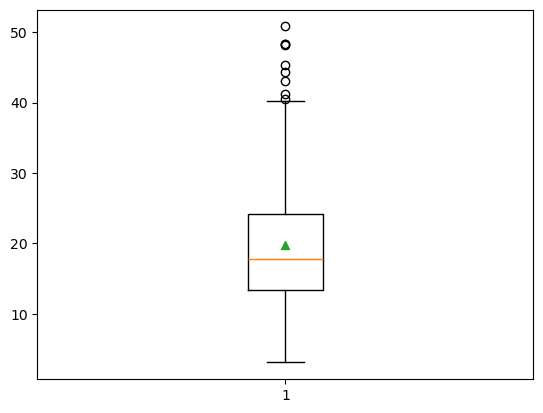

In [25]:
plt.figure()
plt.boxplot(df.total_bill, showmeans = True)
plt.show()

8. What is the min, max, average values of tips? Are there any outliers?


In [27]:
di.iloc[[3, -1, 1], [1]]

,tip
min,1.000000
max,10.000000
mean,2.998279


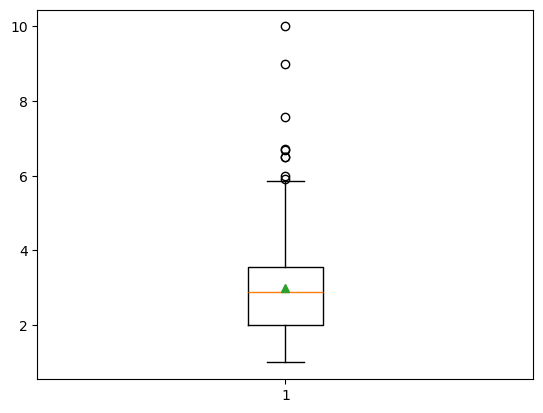

In [28]:
plt.figure()
plt.boxplot(df.tip, showmeans = True)
plt.show()

9. Show the customer with max total bill. What are other features of that customer?

In [30]:
m = df['total_bill'].max()
df[df['total_bill'] == m]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


10. Show the customer with max tip. What are the other features of that customer?

In [32]:
df.sort_values(by = 'tip').iloc[[-1]]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


 11. What gender has higher footfalls on weekdays?

In [34]:
customer_weekdays = df[(df['day'] == 'Thur') | (df['day'] == 'Fri')]
customer_weekdays

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
223,15.98,3.00,Female,No,Fri,Lunch,3
224,13.42,1.58,Male,Yes,Fri,Lunch,2
225,16.27,2.50,Female,Yes,Fri,Lunch,2
226,10.09,2.00,Female,Yes,Fri,Lunch,2


In [35]:
cw = customer_weekdays.sex.value_counts()
cw

sex
Female    41
Male      40
Name: count, dtype: int64

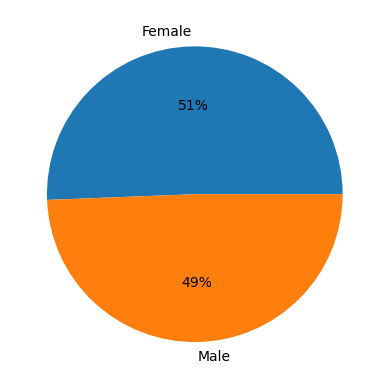

In [36]:
plt.figure()
plt.pie(cw, labels = cw.index, autopct = '%0.0f%%')
plt.show()

12.What gender has higher footfalls on weekends?

In [38]:
customer_weekends = df[(df['day'] == 'Sun') | (df['day'] == 'Sat')]
customer_weekends

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [39]:
cwd = customer_weekends.sex.value_counts()
cwd

sex
Male      117
Female     46
Name: count, dtype: int64

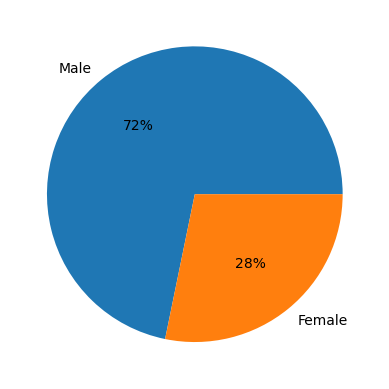

In [40]:
plt.figure()
plt.pie(cwd, labels = cwd.index, autopct = '%0.0f%%')
plt.show()

13. List top ten tippers.

In [42]:
top_tipper = df.sort_values(by = 'tip').iloc[-1:-11:-1]
top_tipper

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
214,28.17,6.50,Female,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
239,29.03,5.92,Male,No,Sat,Dinner,3
88,24.71,5.85,Male,No,Thur,Lunch,2


14. List top five tippers on weekends.

In [44]:
cwd1 = customer_weekends.sort_values(by = 'tip').iloc[-1:-6:-1]
cwd1

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


15. Who are the generous tipper? - A smoker or a non-smoker?

2.99827868852459
     total_bill   tip     sex smoker   day    time  size
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
7         26.88  3.12    Male     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
232       11.61  3.39    Male     No   Sat  Dinner     2
234       15.53  3.00    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
239       29.03  5.92    Male     No   Sat  Dinner     3
243       18.78  3.00  Female     No  Thur  Dinner     2

[121 rows x 7 columns]
smoker
No     71
Yes    50
Name: count, dtype: int64


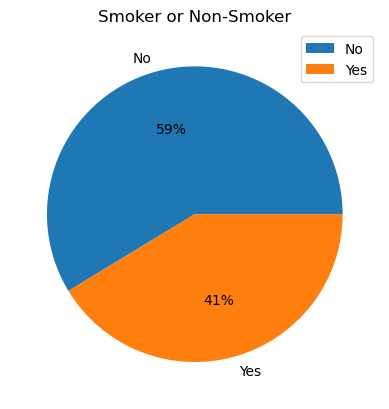

In [46]:
tip_mean = df['tip'].mean()
print(tip_mean)
generous_tipper = df[df['tip'] > tip_mean]
print(generous_tipper)
gt = generous_tipper.smoker.value_counts()
print(gt)
plt.figure()
plt.title('Smoker or Non-Smoker')
plt.pie(gt, labels = gt.index, autopct = '%0.0f%%')
plt.legend()
plt.show()

16. Who are the generous tipper? - A male or a female?

sex
Male      82
Female    39
Name: count, dtype: int64


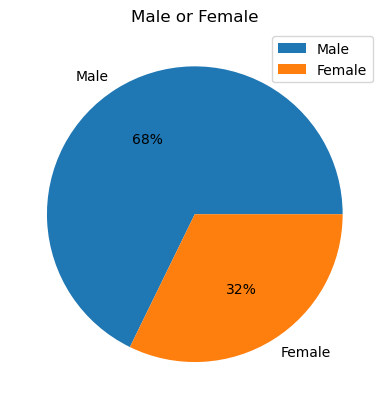

In [48]:
gts = generous_tipper.sex.value_counts()
print(gts)
plt.figure()
plt.title('Male or Female')
plt.pie(gts, labels = gts.index, autopct = '%0.0f%%')
plt.legend()
plt.show()

17. List top five female tippers. How many of them were smokers?

In [50]:
female_tippers = df[df['sex'] == 'Female'].sort_values(by = 'tip').iloc[-1:-6:-1]
female_tippers

,total_bill,tip,sex,smoker,day,time,size
214,28.17,6.50,Female,Yes,Sat,Dinner,3
52,34.81,5.20,Female,No,Sun,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
155,29.85,5.14,Female,No,Sun,Dinner,5
143,27.05,5.00,Female,No,Thur,Lunch,6


In [51]:
female_tippers.smoker.value_counts()

smoker
No     4
Yes    1
Name: count, dtype: int64

18. List top five male tippers. What did they have - Lunch/Dinner?

In [53]:
male_tippers = df[df['sex'] == 'Male'].sort_values(by = 'tip').iloc[-1:-6:-1]
male_tippers

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6


In [54]:
male_tippers.time.value_counts()

time
Dinner    4
Lunch     1
Name: count, dtype: int64

19. Create a new column - 'tip%'. It will contain the values of tips w.r.t total bills.

In [56]:
df['tip_percentage'] = ((df['tip']*100)/df['total_bill']).round(2)
df

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.39
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.36
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82


20. Who came with larger party sizes - males or females?

2.569672131147541
     total_bill   tip     sex smoker  day    time  size  tip_percentage
1         10.34  1.66    Male     No  Sun  Dinner     3           16.05
2         21.01  3.50    Male     No  Sun  Dinner     3           16.66
4         24.59  3.61  Female     No  Sun  Dinner     4           14.68
5         25.29  4.71    Male     No  Sun  Dinner     4           18.62
7         26.88  3.12    Male     No  Sun  Dinner     4           11.61
..          ...   ...     ...    ...  ...     ...   ...             ...
227       20.45  3.00    Male     No  Sat  Dinner     4           14.67
230       24.01  2.00    Male    Yes  Sat  Dinner     4            8.33
231       15.69  3.00    Male    Yes  Sat  Dinner     3           19.12
238       35.83  4.67  Female     No  Sat  Dinner     3           13.03
239       29.03  5.92    Male     No  Sat  Dinner     3           20.39

[84 rows x 8 columns]


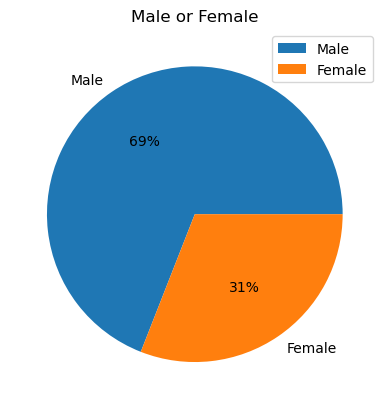

In [58]:
party_mean = df['size'].mean()
print(party_mean)
party_size = df[df['size']> party_mean]
print(party_size)
ps = party_size.sex.value_counts()
ps
plt.figure()
plt.title('Male or Female')
plt.pie(ps, labels = ps.index, autopct = '%0.0f%%')
plt.legend()
plt.show()

21. Who came with larger party sizes - smokers or non-smokers?

smoker
No     59
Yes    25
Name: count, dtype: int64


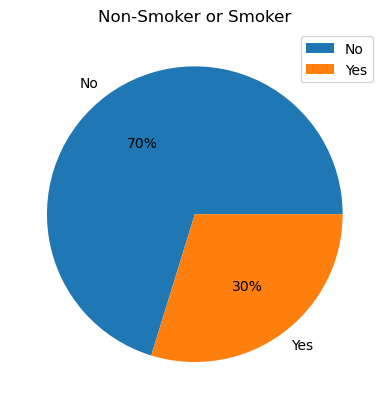

In [60]:
ps1 = party_size.smoker.value_counts()
print(ps1)
plt.figure()
plt.title('Non-Smoker or Smoker')
plt.pie(ps1, labels = ps1.index, autopct = '%0.0f%%')
plt.legend()
plt.show()

22. What is the maximum tip given by a non-smoker female?

In [62]:
max_non_smoker_female = df[(df['smoker'] == 'No') & (df['sex'] == 'Female')].sort_values(by = 'tip').iloc[[-1]]
max_non_smoker_female

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
52,34.81,5.2,Female,No,Sun,Dinner,4,14.94


23. What is the maximum tip given by a smoker male?

In [64]:
max_smoker_male = df[(df['smoker'] == 'Yes') & (df['sex'] == 'Male')].sort_values(by = 'tip').iloc[[-1]]
max_smoker_male

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
170,50.81,10.0,Male,Yes,Sat,Dinner,3,19.68


24. List top five customers who has highest tip-to-bill ratio.

In [66]:
df.sort_values(by = 'tip_percentage').iloc[-1:-6:-1]

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.67
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.57
232,11.61,3.39,Male,No,Sat,Dinner,2,29.20
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.05


25. Show distributions of total bill and tips. What conclusion can be drawn from it?


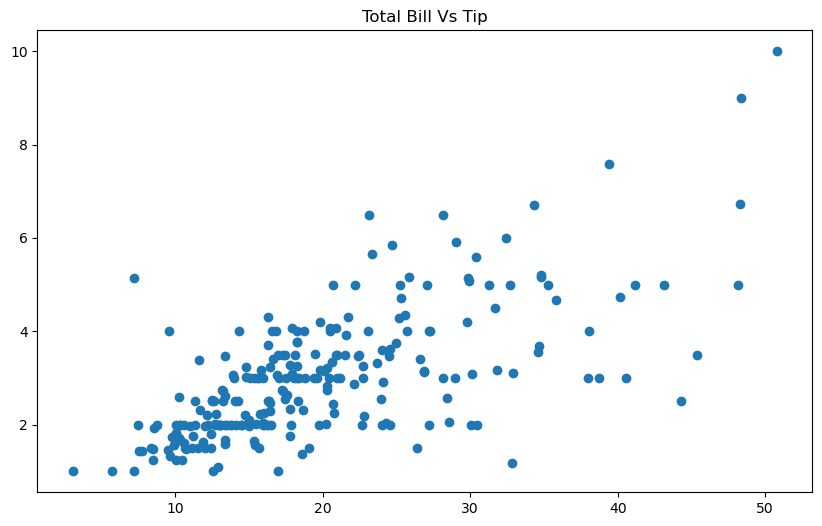

In [110]:
plt.figure(figsize=(10, 6))
plt.title("Total Bill Vs Tip")
plt.scatter(df['total_bill'], df['tip'])
plt.show()